In [1]:
#to avoid warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("data/abcnews-date-text.csv",error_bad_lines=False,nrows=20000)
data.head()

,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [4]:
data.shape

(20000, 2)

In [5]:
#checking for duplicates in headlines
data[data['headline_text'].duplicated(keep=False)].sort_values('headline_text').head(10)

,publish_date,headline_text
9253,20030404,5 australian sars cases being monitored
9458,20030405,5 australian sars cases being monitored
6192,20030321,all walks of life follow protest path
6402,20030322,all walks of life follow protest path
15880,20030507,an early taste of later battles
4597,20030313,an early taste of later battles
6409,20030322,asio briefs crean on terrorist risk
6197,20030321,asio briefs crean on terrorist risk
17498,20030515,athens olympic games tickets on sale
17065,20030513,athens olympic games tickets on sale


In [6]:
data = data.drop_duplicates('headline_text')

In [7]:
data.shape

(19938, 2)

### Model 01

Removing Stopwords

In [ ]:
#we are importiting 2 functions from sklearn for NLP

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
len(text.ENGLISH_STOP_WORDS) #ENGLISH_STOP_WORDS is a frozenset where all the stopwords are listed

318

In [33]:
text.ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [34]:
#selecting the stopwords and adding puctuations to it
punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
StopWords = text.ENGLISH_STOP_WORDS.union(punc)

In [35]:
StopWords

frozenset({'!',
           '"',
           '%',
           "'",
           '(',
           ')',
           ',',
           '.',
           ':',
           ';',
           '?',
           '[',
           ']',
           'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
    

In [36]:
len(StopWords)

333

In [37]:
desc = data['headline_text'].values
desc #dataframe column is converted to an array.

array(['aba decides against community broadcasting licence',
       'act fire witnesses must be aware of defamation',
       'a g calls for infrastructure protection summit', ...,
       'beattie praises federal govts environment effort',
       'blackout cause still under investigation',
       'boost planned for central vic tourism'], dtype=object)

In [38]:
vectorizer = TfidfVectorizer(stop_words = StopWords)
X=vectorizer.fit_transform(desc) #transorming desc to corresponding vector.

In [39]:
print("X is the TDIDF vector with %s rows and %s unique words(features)"%(X.shape[0],X.shape[1]))

X is the TDIDF vector with 19938 rows and 13838 unique words(features)


In [40]:
word_features = vectorizer.get_feature_names() #identiying the word from the vectors
word_features[500:510]

['affairs',
 'affect',
 'affected',
 'affecting',
 'afffects',
 'affiliate',
 'affirms',
 'afford',
 'affordable',
 'afghan']

In [41]:
X.shape  #we have 19938 observations and 13838 unique words present in the corpus 
# X will be the vector corresponding to data['headline_text']. This can be used for any ML tasks.

(19938, 13838)

### Model 2

Case Conversion

Tokenization

Stemming

Removing Stopwords

In [18]:
#we are adding stemming  and tokenization to the preprocessing from the package NLTK
from nltk.stem.snowball import SnowballStemmer #SnowballStemmer is a stemming algorithm
from nltk.tokenize import RegexpTokenizer

In [19]:
stemmer = SnowballStemmer(language='english')
tokenizer = RegexpTokenizer(pattern=r'[a-zA-Z\']+')

def tokenize(text):
   
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())] 

#Step1 - Convert text to lower
#Step2 - Tokenize the text
#Step3 - Stem the tokenized text

#lower case
#tokenize
#stemming

In [20]:
def tokenize_function(text):
    lower_words = text.lower()
    tokenized = tokenizer.tokenize(lower_words)
    stem_list  = list()
    for x in tokenized:
        stem_list.append(stemmer.stem(x))
    return stem_list

In [21]:
tokenize_function("INDIA launched  2 new satelites, and the launch is Success")

['india', 'launch', 'new', 'satelit', 'and', 'the', 'launch', 'is', 'success']

In [22]:
tokenize("INDIA launched  2 new satelites, and the launch is Success")

['india', 'launch', 'new', 'satelit', 'and', 'the', 'launch', 'is', 'success']

In [23]:
tokenizer1 = RegexpTokenizer(r'[a-zA-Z0-9\']+') #new RegEx for including numbers
tokenizer1.tokenize("india launch  2 new satelites, and the launch is success")

['india',
 'launch',
 '2',
 'new',
 'satelites',
 'and',
 'the',
 'launch',
 'is',
 'success']

In [24]:
?TfidfVectorizer

In [25]:
vectorizer2 = TfidfVectorizer(stop_words = StopWords, tokenizer = tokenize) #we are giving StopWords and tokenize function as the arguments
X2 = vectorizer2.fit_transform(desc)
word_features2 = vectorizer2.get_feature_names()
print(len(word_features2))

9504


In [26]:
X2.shape

(19938, 9504)

In [42]:
print("X2 is the TDIDF vector with %s rows and %s unique words(features)"%(X2.shape[0],X2.shape[1]))

X2 is the TDIDF vector with 19938 rows and 9504 unique words(features)


In [43]:
words = vectorizer2.get_feature_names()

In [44]:
words

['aa',
 'aac',
 'aagaard',
 'aagard',
 'aapa',
 'ab',
 'aba',
 'abalon',
 'abandon',
 'abar',
 'abattoir',
 'abba',
 'abbott',
 'abc',
 'abdic',
 'abduct',
 'abductor',
 'abe',
 'abera',
 'abetz',
 'abid',
 'abigroup',
 'abil',
 'abl',
 'ablaz',
 'ablett',
 'aboard',
 'abolish',
 'abolit',
 'aborigin',
 'abort',
 'abov',
 'abreast',
 'abroad',
 'abrolho',
 'absenc',
 'absent',
 'absurd',
 'abu',
 'abund',
 'abus',
 'abysm',
 'ac',
 'aca',
 'academ',
 'academi',
 'acapulco',
 'acb',
 'acc',
 'accc',
 'acceler',
 'accent',
 'accept',
 'access',
 'accessori',
 'accid',
 'accident',
 'accommod',
 'account',
 'accredit',
 'accrington',
 'accru',
 'accus',
 'ace',
 'aceh',
 'acehnes',
 'achiev',
 'achill',
 'acid',
 'acknowledg',
 'acm',
 'acon',
 'acoss',
 'acquir',
 'acquisit',
 'acquit',
 'act',
 'actew',
 'action',
 'activ',
 'activist',
 'actor',
 'actress',
 'actu',
 'acu',
 'ad',
 'adam',
 'add',
 'addict',
 'addit',
 'address',
 'addresss',
 'adelaid',
 'adequ',
 'adf',
 'adhd',
 'ad

In [45]:
X2 #sparse matrix means most of the elements are 0

#Sparse matrix is a matrix which contains very few non-zero elements.

<19938x9504 sparse matrix of type '<class 'numpy.float64'>'
	with 97439 stored elements in Compressed Sparse Row format>

In [46]:
from sklearn.cluster import KMeans  #calculating wcss for identifying the value for K
wcss = []
for i in range(1,20):
    print("cluster",i)
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)

cluster 1
cluster 2
cluster 3
cluster 4
cluster 5
cluster 6
cluster 7
cluster 8
cluster 9
cluster 10
cluster 11
cluster 12
cluster 13
cluster 14
cluster 15
cluster 16
cluster 17
cluster 18
cluster 19


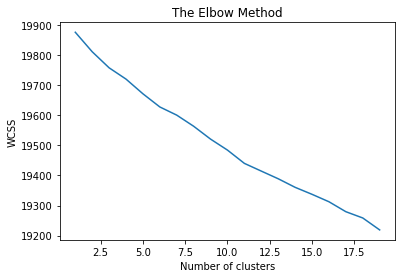

In [47]:
plt.plot(range(1,20),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
#plt.savefig('elbow.png')
plt.show()

In [48]:
kmeans = KMeans(n_clusters = 6, n_init = 20, n_jobs = 1) # n_init(number of iterations for clsutering) n_jobs(number of cpu cores to use)
kmeans.fit(X2)

KMeans(n_clusters=6, n_init=20, n_jobs=1)

In [49]:
common_words = kmeans.cluster_centers_.argsort()[:,-1:-16:-1] #checking for the most ffrequent words in each cluster
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : man, win, face, charg, court, murder, jail, stab, hear, assault, drug, sex, die, hospit, death
1 : new, plan, sar, war, iraqi, say, claim, kill, fund, report, warn, baghdad, urg, protest, boost
2 : govt, vic, nsw, urg, sa, fund, wa, qld, fed, local, tas, reject, consid, claim, plan
3 : iraq, council, war, say, plan, troop, missil, urg, reject, consid, secur, bush, howard, blair, seek
4 : continu, bomb, australian, bali, search, iraqi, kill, baghdad, sar, suspect, suicid, blast, troop, war, trial
5 : polic, probe, investig, man, arrest, search, death, miss, fatal, drug, murder, car, charg, protest, road


In [50]:
result = kmeans.predict(X2)

In [51]:
data['result']=result #adding a new column to dataframe

In [52]:
data.head(25)

,publish_date,headline_text,result
0,20030219,aba decides against community broadcasting lic...,1
1,20030219,act fire witnesses must be aware of defamation,1
2,20030219,a g calls for infrastructure protection summit,1
3,20030219,air nz staff in aust strike for pay rise,1
4,20030219,air nz strike to affect australian travellers,4
5,20030219,ambitious olsson wins triple jump,0
6,20030219,antic delighted with record breaking barca,1
7,20030219,aussie qualifier stosur wastes four memphis match,1
8,20030219,aust addresses un security council over iraq,3
9,20030219,australia is locked into war timetable opp,1
